Dataset
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.


Dataset characteristics
=========================================
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registere

# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn.decomposition import PCA
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing datasets
day = pd.read_csv('./day.csv')
hour = pd.read_csv('./hour.csv')

# Pre-Processing

In [4]:
# Dropping NaN values
day = day.dropna()
hour = hour.dropna()

# DataFrame after dropping NaNs
print("\nDay DataFrame after dropping NaNs:")
print(day.shape)

print("\nHour DataFrame after dropping NaNs:")
print(hour.shape)


Day DataFrame after dropping NaNs:
(731, 16)

Hour DataFrame after dropping NaNs:
(17379, 17)


In [5]:
# Ensuring date/time data is in correct format
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [6]:
# change the index
day.set_index('dteday', inplace=True)
hour.set_index('dteday', inplace=True)
# drop the instant column
day.drop('instant', axis=1, inplace=True)
day.drop('yr', axis=1, inplace=True)
day.drop('mnth', axis=1, inplace=True)
hour.drop('instant', axis=1, inplace=True)
hour.drop('yr', axis=1, inplace=True)
hour.drop('hr', axis=1, inplace=True)
hour.drop('mnth', axis=1, inplace=True)

day_casual = day.drop(['registered', 'cnt'], axis=1)
hour_casual = hour.drop(['registered', 'cnt'], axis=1)

day_registered = day.drop(['casual', 'cnt'], axis=1)
hour_registered = hour.drop(['casual', 'cnt'], axis=1)
# summarize first 5 rows
print(day_registered.head(5))

            season  holiday  weekday  workingday  weathersit      temp  \
dteday                                                                   
2011-01-01       1        0        6           0           2  0.344167   
2011-01-02       1        0        0           0           2  0.363478   
2011-01-03       1        0        1           1           1  0.196364   
2011-01-04       1        0        2           1           1  0.200000   
2011-01-05       1        0        3           1           1  0.226957   

               atemp       hum  windspeed  registered  
dteday                                                 
2011-01-01  0.363625  0.805833   0.160446         654  
2011-01-02  0.353739  0.696087   0.248539         670  
2011-01-03  0.189405  0.437273   0.248309        1229  
2011-01-04  0.212122  0.590435   0.160296        1454  
2011-01-05  0.229270  0.436957   0.186900        1518  


## Data Visualization

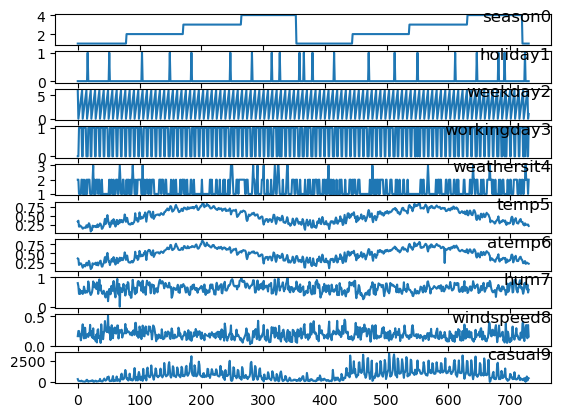

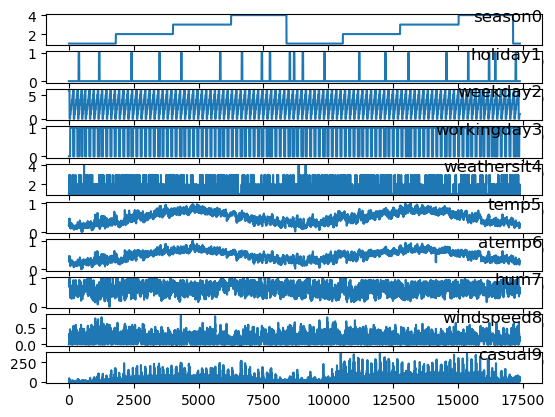

In [7]:
# load dataset
day_casual_values = day_casual.values
hour_casual_values = hour_casual.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(day_casual_values[:, group])
	pyplot.title(day_casual.columns[group]+str(group), y=0.5, loc='right')
	i += 1
pyplot.show()

i = 1
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(hour_casual_values[:, group])
	pyplot.title(hour_casual.columns[group]+str(group), y=0.5, loc='right')
	i += 1
pyplot.show()

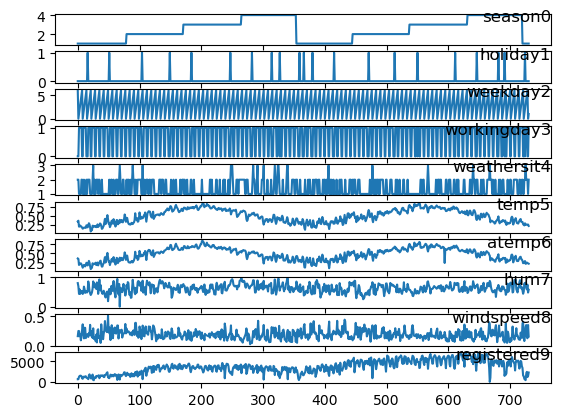

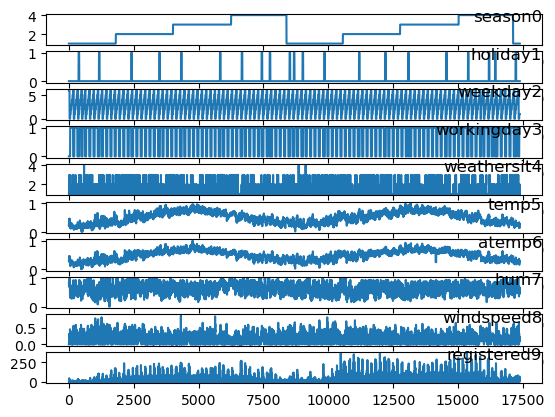

In [8]:
# load dataset
day_reg_values = day_registered.values
hour_reg_values = hour_registered.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(day_reg_values[:, group])
	pyplot.title(day_registered.columns[group]+str(group), y=0.5, loc='right')
	i += 1
pyplot.show()

i = 1
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(hour_casual_values[:, group])
	pyplot.title(hour_registered.columns[group]+str(group), y=0.5, loc='right')
	i += 1
pyplot.show()

# Perform PCA

In [9]:
pca_day_casual = PCA(n_components=2)  # Adjust n_components as needed
pca_day_casual_result = pca_day_casual.fit_transform(day_casual)

# Explained variance ratio
print("Explained Variance Ratio:", pca_day_casual.explained_variance_ratio_)

pca_hour_casual = PCA(n_components=2)  # Adjust n_components as needed
pca_hour_casual_result = pca_hour_casual.fit_transform(hour_casual)

# Explained variance ratio
print("Explained Variance Ratio:", pca_hour_casual.explained_variance_ratio_)

# Reconstruct data using the first two principal components
reconstructed_data = pca_day_casual.inverse_transform(pca_day_casual_result)
reconstructed_day_casual = pd.DataFrame(reconstructed_data, columns=day_casual.columns, index=day.index)

# Reconstruct data using the first two principal components
reconstructed_data = pca_hour_casual.inverse_transform(pca_hour_casual_result)
reconstructed_hour_casual = pd.DataFrame(reconstructed_data, columns=hour_casual.columns, index=hour.index)

Explained Variance Ratio: [9.99987873e-01 8.49973862e-06]
Explained Variance Ratio: [0.99755815 0.00164946]


In [10]:
pca_day_registered = PCA(n_components=2)  # Adjust n_components as needed
pca_day_registered_result = pca_day_registered.fit_transform(day_registered)

# Explained variance ratio
print("Explained Variance Ratio:", pca_day_registered.explained_variance_ratio_)

pca_hour_registered = PCA(n_components=2)  # Adjust n_components as needed
pca_hour_registered_result = pca_hour_registered.fit_transform(hour_registered)

# Explained variance ratio
print("Explained Variance Ratio:", pca_hour_registered.explained_variance_ratio_)

# Reconstruct data using the first two principal components
reconstructed_data = pca_day_registered.inverse_transform(pca_day_registered_result)
reconstructed_day_registered = pd.DataFrame(reconstructed_data, columns=day_registered.columns, index=day.index)

# Reconstruct data using the first two principal components
reconstructed_data = pca_hour_registered.inverse_transform(pca_hour_registered_result)
reconstructed_hour_registered = pd.DataFrame(reconstructed_data, columns=hour_registered.columns, index=hour.index)

Explained Variance Ratio: [9.9999770e-01 1.6465006e-06]
Explained Variance Ratio: [9.99739857e-01 1.75514263e-04]


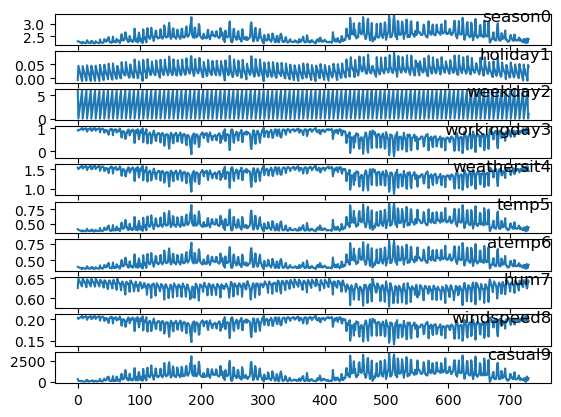

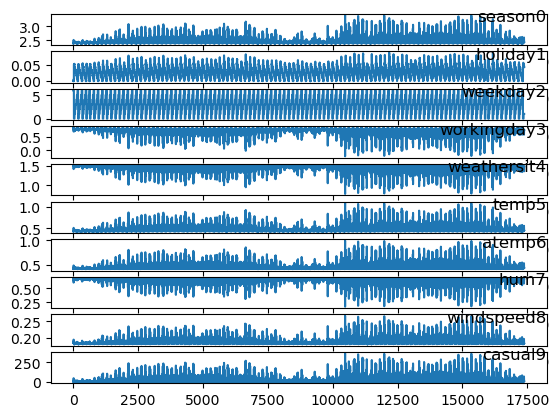

In [11]:
# load dataset
reconstructed_day_casual_values = reconstructed_day_casual.values
reconstructed_hour_casual_values = reconstructed_hour_casual.values

# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(reconstructed_day_casual_values[:, group])
	pyplot.title(reconstructed_day_casual.columns[group]+str(group), y=0.5, loc='right')
	i += 1
pyplot.show()

i = 1
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(reconstructed_hour_casual_values[:, group])
	pyplot.title(reconstructed_hour_casual.columns[group]+str(group), y=0.5, loc='right')
	i += 1
pyplot.show()

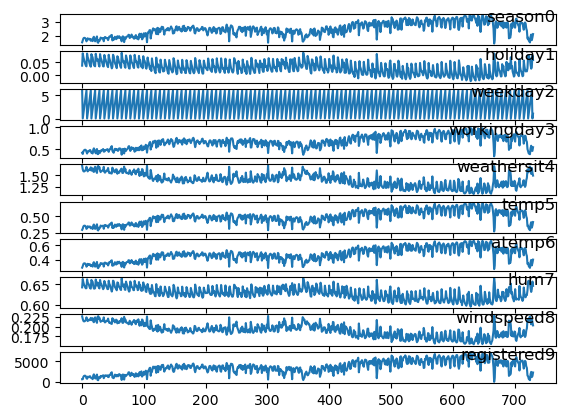

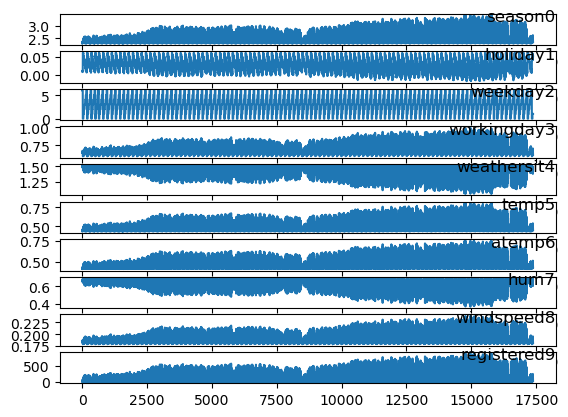

In [12]:
# load dataset
reconstructed_day_reg_values = reconstructed_day_registered.values
reconstructed_hour_reg_values = reconstructed_hour_registered.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(reconstructed_day_reg_values[:, group])
	pyplot.title(reconstructed_day_registered.columns[group]+str(group), y=0.5, loc='right')
	i += 1
pyplot.show()

i = 1
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(reconstructed_hour_reg_values[:, group])
	pyplot.title(reconstructed_hour_registered.columns[group]+str(group), y=0.5, loc='right')
	i += 1
pyplot.show()

In [13]:
# prepare data for lstm

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


# ensure all data is float
day_casual_values = day_casual_values.astype('float32')
hour_casual_values = hour_casual_values.astype('float32')
reconstructed_day_casual_values = reconstructed_day_casual_values.astype('float32')
reconstructed_hour_casual_values = reconstructed_hour_casual_values.astype('float32')

day_reg_values = day_reg_values.astype('float32')
hour_reg_values = hour_reg_values.astype('float32')
reconstructed_day_reg_values = reconstructed_day_reg_values.astype('float32')
reconstructed_hour_reg_values = reconstructed_hour_reg_values.astype('float32')

# normalize features
scaler_day_casual = MinMaxScaler(feature_range=(0, 1))
scaler_hour_casual = MinMaxScaler(feature_range=(0, 1))
scaler_day_reg = MinMaxScaler(feature_range=(0, 1))
scaler_hour_reg = MinMaxScaler(feature_range=(0, 1))

scaler_day_pca_casual = MinMaxScaler(feature_range=(0, 1))
scaler_day_pca_reg = MinMaxScaler(feature_range=(0, 1))
scaler_hour_pca_casual = MinMaxScaler(feature_range=(0, 1))
scaler_hour_pca_reg = MinMaxScaler(feature_range=(0, 1))

day_casual = scaler_day_casual.fit_transform(day_casual_values)
hour_casual = scaler_hour_casual.fit_transform(hour_casual_values)
day_reg = scaler_day_reg.fit_transform(day_reg_values)
hour_reg = scaler_hour_reg.fit_transform(hour_reg_values)

print(day_casual.shape)

day_casual_pca = scaler_day_pca_casual.fit_transform(reconstructed_day_casual_values)
hour_casual_pca = scaler_hour_pca_casual.fit_transform(reconstructed_hour_casual_values)
day_reg_pca = scaler_day_pca_reg.fit_transform(reconstructed_day_reg_values)
hour_reg_pca = scaler_hour_pca_reg.fit_transform(reconstructed_hour_reg_values)

# frame as supervised learning
day_reframed_casual = series_to_supervised(day_casual, 1, 1)
hour_reframed_casual = series_to_supervised(hour_casual, 1, 1)

day_reframed_reg = series_to_supervised(day_reg, 1, 1)
hour_reframed_reg = series_to_supervised(hour_reg, 1, 1)

reconstructed_day_reframed_casual = series_to_supervised(day_casual_pca, 1, 1)
reconstructed_hour_reframed_casual = series_to_supervised(hour_casual_pca, 1, 1)

reconstructed_day_reframed_reg = series_to_supervised(day_reg_pca, 1, 1)
reconstructed_hour_reframed_reg = series_to_supervised(hour_reg_pca, 1, 1)

# drop columns we don't want to predict - predicting casual in this case, can change the 
# dropped columns to predict other columns
day_reframed_casual.drop(day_reframed_casual.columns[[10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)
hour_reframed_casual.drop(hour_reframed_casual.columns[[10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)

# Predicting registered in this case, can change the dropped columns to predict other columns
day_reframed_reg.drop(day_reframed_reg.columns[[10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)
hour_reframed_reg.drop(hour_reframed_reg.columns[[10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)

reconstructed_day_reframed_casual.drop(reconstructed_day_reframed_casual.columns[[10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)
reconstructed_hour_reframed_casual.drop(reconstructed_hour_reframed_casual.columns[[10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)

# Predicting registered in this case, can change the dropped columns to predict other columns
reconstructed_day_reframed_reg.drop(reconstructed_day_reframed_reg.columns[[10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)
reconstructed_hour_reframed_reg.drop(reconstructed_hour_reframed_reg.columns[[10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)

print(day_reframed_casual.shape)

(731, 10)
(730, 11)


In [14]:
day_reframed_casual.head(5)

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var10(t)
1,0.0,0.0,1.000000,0.0,0.5,0.355170,0.373517,0.828620,0.284606,0.096538,0.037852
2,0.0,0.0,0.000000,0.0,0.5,0.379232,0.360541,0.715771,0.466215,0.037852,0.034624
3,0.0,0.0,0.166667,1.0,0.0,0.171000,0.144830,0.449638,0.465740,0.034624,0.031103
4,0.0,0.0,0.333333,1.0,0.0,0.175530,0.174649,0.607131,0.284297,0.031103,0.023474
5,0.0,0.0,0.500000,1.0,0.0,0.209120,0.197158,0.449313,0.339143,0.023474,0.025235


In [15]:
def train_test(day_reframed, hour_reframed):    
    day_values = day_reframed.values
    hour_values = hour_reframed.values

    day_train = day_values[:int(0.8*len(day)), :]
    day_test = day_values[int(0.8*len(day)):, :]
    hour_train = hour_values[:int(0.8*len(hour)), :]
    hour_test = hour_values[int(0.8*len(hour)):, :]

    # split into input and outputs
    day_train_X, day_train_y = day_train[:, :-1], day_train[:, -1]
    day_test_X, day_test_y = day_test[:, :-1], day_test[:, -1]
    hour_train_X, hour_train_y = hour_train[:, :-1], hour_train[:, -1]
    hour_test_X, hour_test_y = hour_test[:, :-1], hour_test[:, -1]
    # reshape input to be 3D [samples, timesteps, features]
    day_train_X = day_train_X.reshape((day_train_X.shape[0], 1, day_train_X.shape[1]))
    day_test_X = day_test_X.reshape((day_test_X.shape[0], 1, day_test_X.shape[1]))
    hour_train_X = hour_train_X.reshape((hour_train_X.shape[0], 1, hour_train_X.shape[1]))
    hour_test_X = hour_test_X.reshape((hour_test_X.shape[0], 1, hour_test_X.shape[1]))

    # print(day_train_X.shape, day_train_y.shape, day_test_X.shape, day_test_y.shape)
    # print(hour_train_X.shape, hour_train_y.shape, hour_test_X.shape, hour_test_y.shape)
    return day_train_X, day_train_y, day_test_X, day_test_y, hour_train_X, hour_train_y, hour_test_X, hour_test_y

# LSTMs

In [22]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import concatenate
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
def evaluate_model(train_X, train_y, test_X, test_y, scaler, LSTM_units=50, epochs=50, batch_size=72, verbose=2):
    verbose, epochs, batch_size = verbose, epochs, batch_size
    n_timesteps, n_features = (train_X.shape[1], train_X.shape[2])
    model = Sequential()
    model.add(LSTM(LSTM_units, input_shape=(n_timesteps,n_features)))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mae', optimizer='adam')
    # fit network
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=verbose, shuffle=False)
    # plot history
    # pyplot.plot(history.history['loss'], label='train')
    # pyplot.plot(history.history['val_loss'], label='test')
    # pyplot.title('LSTM Units: '+str(LSTM_units)+' Epochs: '+str(epochs)+' Batch Size: '+str(batch_size))
    # pyplot.legend()
    # pyplot.show()
    # evaluate model
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
    # invert scaling for forecast
    inv_yhat = concatenate((test_X[:, :-1], yhat), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,-1]
    # calculate RMSE
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = concatenate((test_X[:, :-1], test_y), axis=1)
    
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-1]
    rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
    r2 = r2_score(inv_y, inv_yhat)
    print('Test RMSE: %.3f' % rmse)
    print('Test R2: %.3f' % r2)
    # print(model.summary())
    return model, rmse, r2


In [24]:
day_train_X, day_train_y, day_test_X, day_test_y, hour_train_X, hour_train_y, hour_test_X, hour_test_y = train_test(day_reframed_casual, hour_reframed_casual)
day_casual_rmse = []
day_casual_r2 = []
day_casual_model = []
print("Checking daily casual")
for ep in [10, 50]:
    for lstm in [16, 32, 64]:
        for batch in [10, 32]:
            print("[*] Epochs: ", ep)
            print("Batch Size: ", batch)
            print("LSTM Units: ", lstm)
            model, rmse, r2 = evaluate_model(day_train_X, day_train_y, day_test_X, day_test_y, scaler_day_casual, LSTM_units=lstm, epochs=ep, batch_size=batch, verbose=0)
            day_casual_rmse.append(rmse)
            day_casual_r2.append(r2)
            day_casual_model.append(model)
            # print("\n\n")

hour_casual_rmse = []
hour_casual_r2 = []
hour_casual_model = []
print("Checking hourly casual")
for ep in [10, 50]:
    for lstm in [16, 32, 64]:
        for batch in [10, 32]:
            print("[*] Epochs: ", ep)
            print("Batch Size: ", batch)
            print("LSTM Units: ", lstm)
            model, rmse, r2 = evaluate_model(hour_train_X, hour_train_y, hour_test_X, hour_test_y, scaler_hour_casual, LSTM_units=lstm, epochs=ep, batch_size=batch, verbose=0)
            hour_casual_rmse.append(rmse)
            hour_casual_r2.append(r2)
            hour_casual_model.append(model)
            # print("\n\n")

Checking daily casual
[*] Epochs:  10
Batch Size:  10
LSTM Units:  16


2023-12-04 17:49:26.938301: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-12-04 17:49:26.969876: W tensorflow/c/c_api.cc:291] Operation '{name:'training/Adam/dense_25/kernel/m/Assign' id:581 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_25/kernel/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_25/kernel/m, training/Adam/dense_25/kernel/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:27.175097: W tensorflow/c/c_api.cc:291] Operation '{name:'loss/mul' id:202 op device:{requested: '', assigned: ''} def:{{{node loss/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss/mul/x, loss/dense_25_loss/value)}}' was ch

Test RMSE: 475.320
Test R2: 0.544
[*] Epochs:  10
Batch Size:  32
LSTM Units:  16


2023-12-04 17:49:28.071330: W tensorflow/c/c_api.cc:291] Operation '{name:'training_2/Adam/dense_26/kernel/m/Assign' id:1254 op device:{requested: '', assigned: ''} def:{{{node training_2/Adam/dense_26/kernel/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_2/Adam/dense_26/kernel/m, training_2/Adam/dense_26/kernel/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:28.259213: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_1/mul' id:877 op device:{requested: '', assigned: ''} def:{{{node loss_1/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_1/mul/x, loss_1/dense_26_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an err

Test RMSE: 588.773
Test R2: 0.300
[*] Epochs:  10
Batch Size:  10
LSTM Units:  32


2023-12-04 17:49:28.706120: W tensorflow/c/c_api.cc:291] Operation '{name:'training_4/Adam/lstm_27/lstm_cell_27/bias/v/Assign' id:1953 op device:{requested: '', assigned: ''} def:{{{node training_4/Adam/lstm_27/lstm_cell_27/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_4/Adam/lstm_27/lstm_cell_27/bias/v, training_4/Adam/lstm_27/lstm_cell_27/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:28.932100: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_2/mul' id:1550 op device:{requested: '', assigned: ''} def:{{{node loss_2/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_2/mul/x, loss_2/dense_27_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation wil

Test RMSE: 464.967
Test R2: 0.564
[*] Epochs:  10
Batch Size:  32
LSTM Units:  32


2023-12-04 17:49:30.026797: W tensorflow/c/c_api.cc:291] Operation '{name:'training_6/Adam/lstm_28/lstm_cell_28/bias/m/Assign' id:2601 op device:{requested: '', assigned: ''} def:{{{node training_6/Adam/lstm_28/lstm_cell_28/bias/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_6/Adam/lstm_28/lstm_cell_28/bias/m, training_6/Adam/lstm_28/lstm_cell_28/bias/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:30.241578: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_3/mul' id:2227 op device:{requested: '', assigned: ''} def:{{{node loss_3/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_3/mul/x, loss_3/dense_28_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation wil

Test RMSE: 1220.283
Test R2: -2.005
[*] Epochs:  10
Batch Size:  10
LSTM Units:  64


2023-12-04 17:49:30.841012: W tensorflow/c/c_api.cc:291] Operation '{name:'training_8/Adam/dense_29/kernel/v/Assign' id:3312 op device:{requested: '', assigned: ''} def:{{{node training_8/Adam/dense_29/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_8/Adam/dense_29/kernel/v, training_8/Adam/dense_29/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:31.151969: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_4/mul' id:2904 op device:{requested: '', assigned: ''} def:{{{node loss_4/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_4/mul/x, loss_4/dense_29_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an er

Test RMSE: 467.419
Test R2: 0.559
[*] Epochs:  10
Batch Size:  32
LSTM Units:  64


2023-12-04 17:49:32.206592: W tensorflow/c/c_api.cc:291] Operation '{name:'training_10/Adam/learning_rate/Assign' id:3936 op device:{requested: '', assigned: ''} def:{{{node training_10/Adam/learning_rate/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_10/Adam/learning_rate, training_10/Adam/learning_rate/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:32.467163: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_5/mul' id:3581 op device:{requested: '', assigned: ''} def:{{{node loss_5/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_5/mul/x, loss_5/dense_30_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error 

Test RMSE: 546.375
Test R2: 0.398
[*] Epochs:  50
Batch Size:  10
LSTM Units:  16


2023-12-04 17:49:33.083172: W tensorflow/c/c_api.cc:291] Operation '{name:'lstm_31/lstm_cell_31/recurrent_kernel/Assign' id:4088 op device:{requested: '', assigned: ''} def:{{{node lstm_31/lstm_cell_31/recurrent_kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](lstm_31/lstm_cell_31/recurrent_kernel, lstm_31/lstm_cell_31/recurrent_kernel/Initializer/mul_1)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:33.362249: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_6/mul' id:4258 op device:{requested: '', assigned: ''} def:{{{node loss_6/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_6/mul/x, loss_6/dense_31_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and wi

Test RMSE: 455.271
Test R2: 0.582
[*] Epochs:  50
Batch Size:  32
LSTM Units:  16


2023-12-04 17:49:35.997343: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_32/kernel/Assign' id:4901 op device:{requested: '', assigned: ''} def:{{{node dense_32/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_32/kernel, dense_32/kernel/Initializer/random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:36.289778: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_7/mul' id:4931 op device:{requested: '', assigned: ''} def:{{{node loss_7/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_7/mul/x, loss_7/dense_32_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them

Test RMSE: 498.043
Test R2: 0.499
[*] Epochs:  50
Batch Size:  10
LSTM Units:  32


2023-12-04 17:49:38.668167: W tensorflow/c/c_api.cc:291] Operation '{name:'lstm_33/lstm_cell_33/kernel/Assign' id:5414 op device:{requested: '', assigned: ''} def:{{{node lstm_33/lstm_cell_33/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](lstm_33/lstm_cell_33/kernel, lstm_33/lstm_cell_33/kernel/Initializer/random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:39.006422: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_8/mul' id:5604 op device:{requested: '', assigned: ''} def:{{{node loss_8/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_8/mul/x, loss_8/dense_33_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the futu

Test RMSE: 457.113
Test R2: 0.578
[*] Epochs:  50
Batch Size:  32
LSTM Units:  32


2023-12-04 17:49:41.642791: W tensorflow/c/c_api.cc:291] Operation '{name:'lstm_34/lstm_cell_34/kernel/Assign' id:6091 op device:{requested: '', assigned: ''} def:{{{node lstm_34/lstm_cell_34/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](lstm_34/lstm_cell_34/kernel, lstm_34/lstm_cell_34/kernel/Initializer/random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:42.042503: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_9/mul' id:6281 op device:{requested: '', assigned: ''} def:{{{node loss_9/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_9/mul/x, loss_9/dense_34_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the futu

Test RMSE: 492.766
Test R2: 0.510
[*] Epochs:  50
Batch Size:  10
LSTM Units:  64


2023-12-04 17:49:43.379210: W tensorflow/c/c_api.cc:291] Operation '{name:'training_20/Adam/lstm_35/lstm_cell_35/recurrent_kernel/m/Assign' id:7327 op device:{requested: '', assigned: ''} def:{{{node training_20/Adam/lstm_35/lstm_cell_35/recurrent_kernel/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_20/Adam/lstm_35/lstm_cell_35/recurrent_kernel/m, training_20/Adam/lstm_35/lstm_cell_35/recurrent_kernel/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:43.769397: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_10/mul' id:6958 op device:{requested: '', assigned: ''} def:{{{node loss_10/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_10/mul/x, loss_10/dense_35_loss/value)}}' was changed by setting at

Test RMSE: 443.600
Test R2: 0.603
[*] Epochs:  50
Batch Size:  32
LSTM Units:  64


2023-12-04 17:49:46.443686: W tensorflow/c/c_api.cc:291] Operation '{name:'training_22/Adam/iter/Assign' id:7970 op device:{requested: '', assigned: ''} def:{{{node training_22/Adam/iter/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_INT64, validate_shape=false](training_22/Adam/iter, training_22/Adam/iter/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:46.806094: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_11/mul' id:7635 op device:{requested: '', assigned: ''} def:{{{node loss_11/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_11/mul/x, loss_11/dense_36_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes

Test RMSE: 490.842
Test R2: 0.514
Checking hourly casual
[*] Epochs:  10
Batch Size:  10
LSTM Units:  16


2023-12-04 17:49:48.207836: W tensorflow/c/c_api.cc:291] Operation '{name:'lstm_37/lstm_cell_37/bias/Assign' id:8151 op device:{requested: '', assigned: ''} def:{{{node lstm_37/lstm_cell_37/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](lstm_37/lstm_cell_37/bias, lstm_37/lstm_cell_37/bias/Initializer/concat)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:49.350778: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_12/mul' id:8312 op device:{requested: '', assigned: ''} def:{{{node loss_12/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_12/mul/x, loss_12/dense_37_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either d

Test RMSE: 20.088
Test R2: 0.871
[*] Epochs:  10
Batch Size:  32
LSTM Units:  16


2023-12-04 17:49:58.540156: W tensorflow/c/c_api.cc:291] Operation '{name:'training_26/Adam/learning_rate/Assign' id:9340 op device:{requested: '', assigned: ''} def:{{{node training_26/Adam/learning_rate/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_26/Adam/learning_rate, training_26/Adam/learning_rate/Initializer/initial_value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:49:59.160180: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_13/mul' id:8985 op device:{requested: '', assigned: ''} def:{{{node loss_13/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_13/mul/x, loss_13/dense_38_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an er

Test RMSE: 20.438
Test R2: 0.867
[*] Epochs:  10
Batch Size:  10
LSTM Units:  32


2023-12-04 17:50:02.646197: W tensorflow/c/c_api.cc:291] Operation '{name:'training_28/Adam/lstm_39/lstm_cell_39/kernel/m/Assign' id:10020 op device:{requested: '', assigned: ''} def:{{{node training_28/Adam/lstm_39/lstm_cell_39/kernel/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_28/Adam/lstm_39/lstm_cell_39/kernel/m, training_28/Adam/lstm_39/lstm_cell_39/kernel/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:50:03.837738: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_14/mul' id:9658 op device:{requested: '', assigned: ''} def:{{{node loss_14/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_14/mul/x, loss_14/dense_39_loss/value)}}' was changed by setting attribute after it was run by a session. 

Test RMSE: 20.103
Test R2: 0.871
[*] Epochs:  10
Batch Size:  32
LSTM Units:  32


2023-12-04 17:50:16.393973: W tensorflow/c/c_api.cc:291] Operation '{name:'training_30/Adam/iter/Assign' id:10670 op device:{requested: '', assigned: ''} def:{{{node training_30/Adam/iter/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_INT64, validate_shape=false](training_30/Adam/iter, training_30/Adam/iter/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:50:17.134395: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_15/mul' id:10335 op device:{requested: '', assigned: ''} def:{{{node loss_15/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_15/mul/x, loss_15/dense_40_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nod

Test RMSE: 20.252
Test R2: 0.869
[*] Epochs:  10
Batch Size:  10
LSTM Units:  64


2023-12-04 17:50:20.867198: W tensorflow/c/c_api.cc:291] Operation '{name:'training_32/Adam/dense_41/bias/m/Assign' id:11396 op device:{requested: '', assigned: ''} def:{{{node training_32/Adam/dense_41/bias/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_32/Adam/dense_41/bias/m, training_32/Adam/dense_41/bias/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:50:22.144132: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_16/mul' id:11012 op device:{requested: '', assigned: ''} def:{{{node loss_16/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_16/mul/x, loss_16/dense_41_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an 

Test RMSE: 20.098
Test R2: 0.871
[*] Epochs:  10
Batch Size:  32
LSTM Units:  64


2023-12-04 17:50:31.544817: W tensorflow/c/c_api.cc:291] Operation '{name:'training_34/Adam/lstm_42/lstm_cell_42/kernel/m/Assign' id:12051 op device:{requested: '', assigned: ''} def:{{{node training_34/Adam/lstm_42/lstm_cell_42/kernel/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_34/Adam/lstm_42/lstm_cell_42/kernel/m, training_34/Adam/lstm_42/lstm_cell_42/kernel/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:50:32.277334: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_17/mul' id:11689 op device:{requested: '', assigned: ''} def:{{{node loss_17/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_17/mul/x, loss_17/dense_42_loss/value)}}' was changed by setting attribute after it was run by a session.

Test RMSE: 20.173
Test R2: 0.870
[*] Epochs:  50
Batch Size:  10
LSTM Units:  16


2023-12-04 17:50:36.340289: W tensorflow/c/c_api.cc:291] Operation '{name:'training_36/Adam/lstm_43/lstm_cell_43/kernel/v/Assign' id:12753 op device:{requested: '', assigned: ''} def:{{{node training_36/Adam/lstm_43/lstm_cell_43/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_36/Adam/lstm_43/lstm_cell_43/kernel/v, training_36/Adam/lstm_43/lstm_cell_43/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:50:37.666976: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_18/mul' id:12366 op device:{requested: '', assigned: ''} def:{{{node loss_18/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_18/mul/x, loss_18/dense_43_loss/value)}}' was changed by setting attribute after it was run by a session.

Test RMSE: 20.099
Test R2: 0.871
[*] Epochs:  50
Batch Size:  32
LSTM Units:  16


2023-12-04 17:51:24.832784: W tensorflow/c/c_api.cc:291] Operation '{name:'training_38/Adam/dense_44/kernel/v/Assign' id:13443 op device:{requested: '', assigned: ''} def:{{{node training_38/Adam/dense_44/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_38/Adam/dense_44/kernel/v, training_38/Adam/dense_44/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:51:25.523033: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_19/mul' id:13039 op device:{requested: '', assigned: ''} def:{{{node loss_19/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_19/mul/x, loss_19/dense_44_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will tri

Test RMSE: 20.215
Test R2: 0.870
[*] Epochs:  50
Batch Size:  10
LSTM Units:  32


2023-12-04 17:51:41.175752: W tensorflow/c/c_api.cc:291] Operation '{name:'dense_45/kernel/Assign' id:13682 op device:{requested: '', assigned: ''} def:{{{node dense_45/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_45/kernel, dense_45/kernel/Initializer/random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:51:42.469012: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_20/mul' id:13712 op device:{requested: '', assigned: ''} def:{{{node loss_20/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_20/mul/x, loss_20/dense_45_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after runnin

Test RMSE: 70.135
Test R2: -0.568
[*] Epochs:  50
Batch Size:  32
LSTM Units:  32


2023-12-04 17:52:32.171796: W tensorflow/c/c_api.cc:291] Operation '{name:'training_42/Adam/lstm_46/lstm_cell_46/bias/m/Assign' id:14763 op device:{requested: '', assigned: ''} def:{{{node training_42/Adam/lstm_46/lstm_cell_46/bias/m/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_42/Adam/lstm_46/lstm_cell_46/bias/m, training_42/Adam/lstm_46/lstm_cell_46/bias/m/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:52:32.930015: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_21/mul' id:14389 op device:{requested: '', assigned: ''} def:{{{node loss_21/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_21/mul/x, loss_21/dense_46_loss/value)}}' was changed by setting attribute after it was run by a session. This mu

Test RMSE: 70.135
Test R2: -0.568
[*] Epochs:  50
Batch Size:  10
LSTM Units:  64


2023-12-04 17:52:49.225573: W tensorflow/c/c_api.cc:291] Operation '{name:'lstm_47/lstm_cell_47/bias/Assign' id:14905 op device:{requested: '', assigned: ''} def:{{{node lstm_47/lstm_cell_47/bias/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](lstm_47/lstm_cell_47/bias, lstm_47/lstm_cell_47/bias/Initializer/concat)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:52:50.585147: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_22/mul' id:15066 op device:{requested: '', assigned: ''} def:{{{node loss_22/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_22/mul/x, loss_22/dense_47_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either

Test RMSE: 20.111
Test R2: 0.871
[*] Epochs:  50
Batch Size:  32
LSTM Units:  64


2023-12-04 17:53:41.746790: W tensorflow/c/c_api.cc:291] Operation '{name:'training_46/Adam/lstm_48/lstm_cell_48/recurrent_kernel/v/Assign' id:16141 op device:{requested: '', assigned: ''} def:{{{node training_46/Adam/lstm_48/lstm_cell_48/recurrent_kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_46/Adam/lstm_48/lstm_cell_48/recurrent_kernel/v, training_46/Adam/lstm_48/lstm_cell_48/recurrent_kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-12-04 17:53:42.674476: W tensorflow/c/c_api.cc:291] Operation '{name:'loss_23/mul' id:15743 op device:{requested: '', assigned: ''} def:{{{node loss_23/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_23/mul/x, loss_23/dense_48_loss/value)}}' was changed by setting 

Test RMSE: 20.183
Test R2: 0.870


In [19]:
day_train_X, day_train_y, day_test_X, day_test_y, hour_train_X, hour_train_y, hour_test_X, hour_test_y = train_test(day_reframed_reg, hour_reframed_reg)
day_reg_rmse = []
day_reg_r2 = []
day_reg_model = []
print("Checking daily registered")
for ep in [10, 50]:
    for lstm in [16, 32, 64]:
        for batch in [10, 32]:
            print("[*] Epochs: ", ep)
            print("Batch Size: ", batch)
            print("LSTM Units: ", lstm)
            model, rmse, r2 = evaluate_model(day_train_X, day_train_y, day_test_X, day_test_y, scaler_day_casual, LSTM_units=lstm, epochs=ep, batch_size=batch, verbose=0)
            day_reg_rmse.append(rmse)
            day_reg_r2.append(r2)
            day_reg_model.append(model)
            # print("\n\n")

hour_reg_rmse = []
hour_reg_r2 = []
hour_reg_model = []
print("Checking hourly registered")
for ep in [10, 50]:
    for lstm in [16, 32, 64]:
        for batch in [10, 32]:
            print("[*] Epochs: ", ep)
            print("Batch Size: ", batch)
            print("LSTM Units: ", lstm)
            model, rmse, r2 = evaluate_model(hour_train_X, hour_train_y, hour_test_X, hour_test_y, scaler_hour_casual, LSTM_units=lstm, epochs=ep, batch_size=batch, verbose=0)
            hour_reg_rmse.append(rmse)
            hour_reg_r2.append(r2)
            hour_reg_model.append(model)
            # print("\n\n")

Checking daily registered
Epochs:  10
Batch Size:  10
LSTM Units:  16


KeyboardInterrupt: 

# With PCA

In [ ]:
day_train_X, day_train_y, day_test_X, day_test_y, hour_train_X, hour_train_y, hour_test_X, hour_test_y = train_test(reconstructed_day_reframed_casual, reconstructed_hour_reframed_casual)
pca_day_casual_rmse = []
pca_day_casual_r2 = []
pca_day_casual_model = []
print("Checking daily casual")
for ep in [10, 50]:
    for lstm in [16, 32, 64]:
        for batch in [10, 32]:
            print("[*] Epochs: ", ep)
            print("Batch Size: ", batch)
            print("LSTM Units: ", lstm)
            model, rmse, r2 = evaluate_model(day_train_X, day_train_y, day_test_X, day_test_y, scaler_day_casual, LSTM_units=lstm, epochs=ep, batch_size=batch, verbose=0)
            pca_day_casual_rmse.append(rmse)
            pca_day_casual_r2.append(r2)
            pca_day_casual_model.append(model)

pca_hour_casual_rmse = []
pca_hour_casual_r2 = []
pca_hour_casual_model = []
print("Checking hourly casual")
for ep in [10, 50]:
    for lstm in [16, 32, 64]:
        for batch in [10, 32]:
            print("[*] Epochs: ", ep)
            print("Batch Size: ", batch)
            print("LSTM Units: ", lstm)
            model, rmse, r2 = evaluate_model(hour_train_X, hour_train_y, hour_test_X, hour_test_y, scaler_hour_casual, LSTM_units=lstm, epochs=ep, batch_size=batch, verbose=0)
            pca_hour_casual_rmse.append(rmse)
            pca_hour_casual_r2.append(r2)
            pca_hour_casual_model.append(model)

Checking daily casual
Epochs:  10
Batch Size:  10
LSTM Units:  16
5/5 [==============================] - 0s 915us/step
Test RMSE: 1220.283
Test R2: -2.005
Epochs:  10
Batch Size:  32
LSTM Units:  16
5/5 [==============================] - 0s 796us/step
Test RMSE: 546.435
Test R2: 0.397
Epochs:  10
Batch Size:  10
LSTM Units:  32
5/5 [==============================] - 0s 951us/step
Test RMSE: 497.030
Test R2: 0.501
Epochs:  10
Batch Size:  32
LSTM Units:  32
5/5 [==============================] - 0s 811us/step
Test RMSE: 537.488
Test R2: 0.417
Epochs:  10
Batch Size:  10
LSTM Units:  64
5/5 [==============================] - 0s 1ms/step
Test RMSE: 1220.283
Test R2: -2.005
Epochs:  10
Batch Size:  32
LSTM Units:  64
5/5 [==============================] - 0s 847us/step
Test RMSE: 523.379
Test R2: 0.447
Epochs:  50
Batch Size:  10
LSTM Units:  16
5/5 [==============================] - 0s 874us/step
Test RMSE: 481.400
Test R2: 0.532
Epochs:  50
Batch Size:  32
LSTM Units:  16
5/5 [==========

In [ ]:
day_train_X, day_train_y, day_test_X, day_test_y, hour_train_X, hour_train_y, hour_test_X, hour_test_y = train_test(reconstructed_day_reframed_reg, reconstructed_hour_reframed_reg)
pca_day_reg_rmse = []
pca_day_reg_r2 = []
pca_day_reg_model = []
print("Checking daily registered")
for ep in [10, 50]:
    for lstm in [16, 32, 64]:
        for batch in [10, 32]:
            print("[*] Epochs: ", ep)
            print("Batch Size: ", batch)
            print("LSTM Units: ", lstm)
            model, rmse, r2 = evaluate_model(day_train_X, day_train_y, day_test_X, day_test_y, scaler_day_casual, LSTM_units=lstm, epochs=ep, batch_size=batch, verbose=0)
            pca_day_reg_rmse.append(rmse)
            pca_day_reg_r2.append(r2)
            pca_day_reg_model.append(model)

pca_hour_reg_rmse = []
pca_hour_reg_r2 = []
pca_hour_reg_model = []
print("Checking hourly registered")
for ep in [10, 50]:
    for lstm in [16, 32, 64]:
        for batch in [10, 32]:
            print("[*] Epochs: ", ep)
            print("Batch Size: ", batch)
            print("LSTM Units: ", lstm)
            model, rmse, r2 = evaluate_model(hour_train_X, hour_train_y, hour_test_X, hour_test_y, scaler_hour_casual, LSTM_units=lstm, epochs=ep, batch_size=batch, verbose=0)
            pca_hour_reg_rmse.append(rmse)
            pca_hour_reg_r2.append(r2)
            pca_hour_reg_model.append(model)

Checking daily registered
Epochs:  10
Batch Size:  10
LSTM Units:  16
5/5 [==============================] - 0s 806us/step
Test RMSE: 2518.892
Test R2: -9.516
Epochs:  10
Batch Size:  32
LSTM Units:  16
5/5 [==============================] - 0s 786us/step
Test RMSE: 2518.892
Test R2: -9.516
Epochs:  10
Batch Size:  10
LSTM Units:  32
5/5 [==============================] - 0s 834us/step
Test RMSE: 2518.892
Test R2: -9.516
Epochs:  10
Batch Size:  32
LSTM Units:  32
5/5 [==============================] - 0s 883us/step
Test RMSE: 486.956
Test R2: 0.607
Epochs:  10
Batch Size:  10
LSTM Units:  64
5/5 [==============================] - 0s 892us/step
Test RMSE: 473.976
Test R2: 0.628
Epochs:  10
Batch Size:  32
LSTM Units:  64
5/5 [==============================] - 0s 894us/step
Test RMSE: 476.740
Test R2: 0.623
Epochs:  50
Batch Size:  10
LSTM Units:  16
5/5 [==============================] - 0s 844us/step
Test RMSE: 473.704
Test R2: 0.628
Epochs:  50
Batch Size:  32
LSTM Units:  16
5/5 [==

# SHAP

In [25]:
import shap

In [26]:
def shap4lstm(model, train_data, test_data):
    explainer = shap.DeepExplainer(model, train_data)
    shap_values = explainer.shap_values(test_data)
    shap.summary_plot(shap_values, test_data)   

IndexError: index 1 is out of bounds for axis 0 with size 1

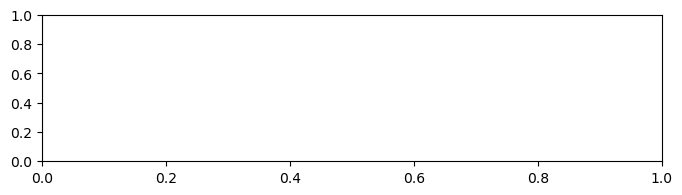

In [27]:
day_train_X, day_train_y, day_test_X, day_test_y, hour_train_X, hour_train_y, hour_test_X, hour_test_y = train_test(day_reframed_casual, hour_reframed_casual)
shap4lstm(day_casual_model[-2], day_train_X[:100], day_test_X[:50])

# for model in day_casual_model:
#     shap4lstm(model, day_train_X[:100], day_test_X[:50])


In [ ]:
train_data = []
test_data = []
for model in day_casual_model:
    shap4lstm(model, train_data, test_data)

In [ ]:
train_data = []
test_data = []
for model in pca_day_casual_model:
    shap4lstm(model, train_data, test_data)

In [ ]:
train_data = []
test_data = []
for model in pca_hour_casual_model:
    shap4lstm(model, train_data, test_data)